In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
from math import sqrt
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

      co2_ppm
Year         
1980   338.91
1981   338.43
1982   342.16
1983   341.34
1984   343.62
1985   344.80
1986   346.94
1987   347.82
1988   349.68
1989   352.10
1990   353.59
1991   354.95
1992   356.83
1993   356.02
1994   357.57
1995   359.25
1996   362.45
1997   362.68
1998   365.21
1999   367.44
2000   368.84
2001   369.79
2002   373.32
2003   375.43
2004   376.49
2005   377.98
2006   381.45
2007   383.42
2008   385.04
2009   386.52
2010   390.54
2011   390.48
2012   392.09
2013   394.44
2014   397.26
2015   401.59
2016   401.86
2017   406.87
2018   408.68
2019   409.73
2020   412.64
2021   420.00
2022   423.00
2023   427.00
2024   430.00
2025   433.00
2026   437.00
2027   440.00
2028   443.00
2029   448.00
2030   450.00


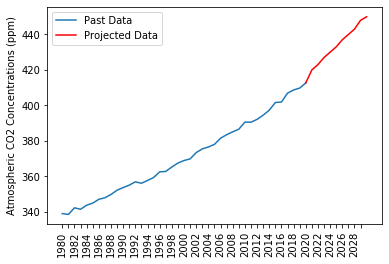

In [69]:
#data on atmospheric carbon dioxide concentrations 
co2 = pd.read_excel("co2ppm.xlsx")

y1 = co2['co2_ppm'].loc[:40]
y2 = co2['co2_ppm'].loc[40:]

plt.plot(co2['co2_ppm'].loc[:40], label="Past Data")
plt.plot(co2['co2_ppm'].loc[40:], label="Projected Data", color='red')
plt.xticks(np.arange(50), range(1980, 2030), rotation=90)
ax=plt.gca()
[label.set_visible(False) for (index,label) in enumerate(ax.xaxis.get_ticklabels()) if index % 2 != 0]
plt.legend(loc="upper left")
plt.ylabel("Atmospheric CO2 Concentrations (ppm)")
annual_co2 = co2.set_index('Year')
print(annual_co2)

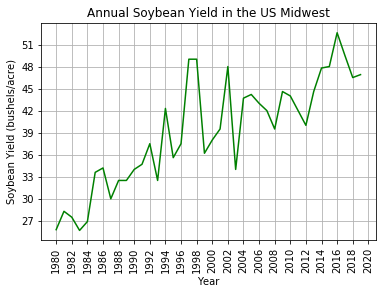

<Figure size 3600x1440 with 0 Axes>

In [68]:
#data on soybean yields 
soy_yield = pd.read_excel("annual_midwest_soybean_yield.xlsx")

#soy_yield.plot(x ='Year', y='Soybean Yield (bushels/acre)', title = "Annual Soybean Yield in the US Midwest", kind = 'line')
#annual_soy_yield = soy_yield.set_index('Year')

tick_spacing = 2
fig, ax = plt.subplots(1,1)
ax.plot(soy_yield['Year'], soy_yield['Soybean Yield (bushels/acre)'], color='green')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xlabel('Year')
tick_spacing = 3
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('Soybean Yield (bushels/acre)')
plt.xticks(rotation=90)
ax.set_title("Annual Soybean Yield in the US Midwest")
plt.grid()
plt.show()

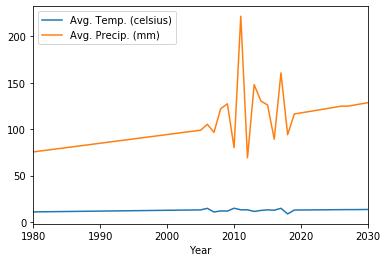

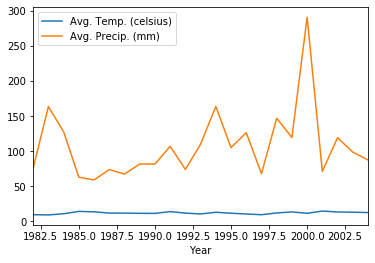

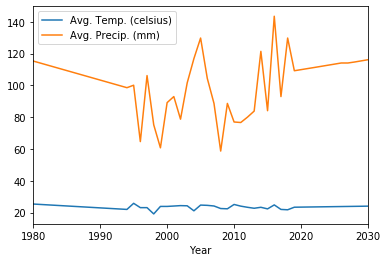

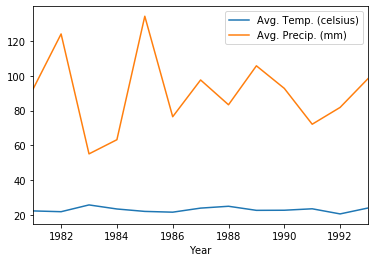

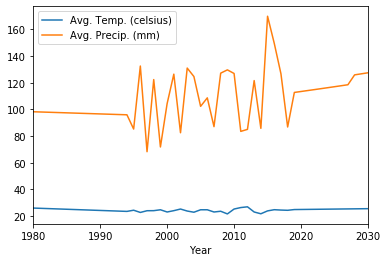

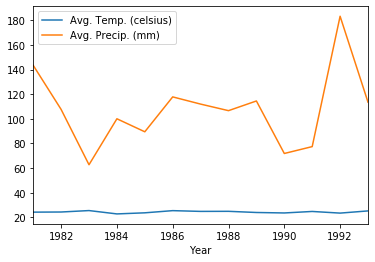

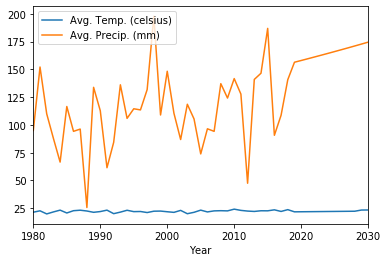

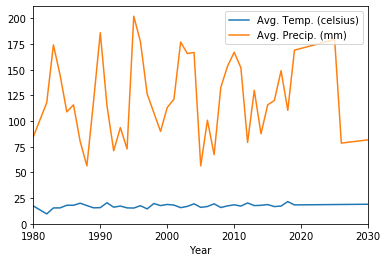

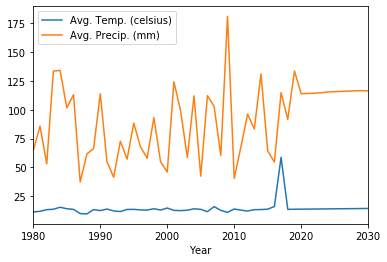

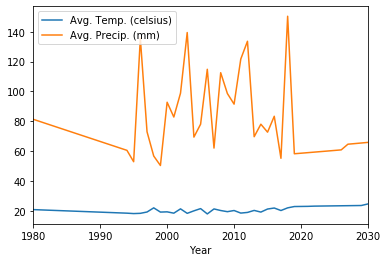

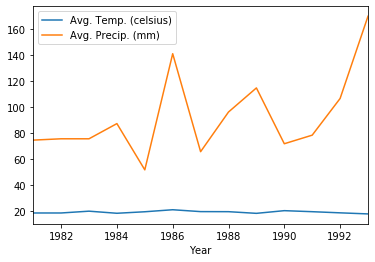

In [4]:
temps_precip = pd.read_excel("avg_temps_precip.xlsx")
temps_precip
#group the different months together in order of year
months = temps_precip.sort_values(['Year'],ascending=True).groupby('Month').plot(x='Year', kind='line')

In [5]:
climate_yearly = temps_precip.groupby('Year')
for key, item in climate_yearly:
    print(climate_yearly.get_group(key), "\n\n")

   Year      Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
0  1980      April                 10.89              75.44
1  1980        May                 17.33              84.83
2  1980       June                 21.44              95.00
3  1980       July                 26.06              98.30
4  1980     August                 25.33             115.32
5  1980  September                 20.72              81.28
6  1980    October                 11.33              64.77 


    Year       Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
7   1981        June                 22.67             152.15
8   1981       July                  24.22             143.51
9   1981     August                  22.39              92.46
10  1981  September                  18.39              74.42
11  1981     October                 11.89              85.85 


    Year       Month  Avg. Temp. (celsius)  Avg. Precip. (mm)
12  1982      April                   9.44              75.95
13  1982         M

In [6]:
projected_temps_precip = pd.read_excel("projected_temp_precip.xlsx")
projected_temps_precip

,Year,Projected Annual Temperature Increase (celsius),Projected Annual Precipitation Increase Spring(%),Projected Annual Precipitation Increase Summer (%),Projected Annual Precipitation Increase Fall (%)
0,2020,0.06,1,0.625,0.2
1,2021,0.12,2,1.250,0.4
2,2022,0.18,3,1.875,0.6
3,2023,0.24,4,2.500,0.8
4,2024,0.30,5,3.125,1.0
5,2025,0.36,6,4.375,1.2
6,2026,0.42,7,5.000,1.4
7,2027,0.60,10,5.625,1.6
8,2028,0.66,11,6.250,1.8


In [5]:
all_data = pd.read_excel("all_data.xlsx")

np_all_data = all_data.to_numpy()
X = np_all_data[:278, :4] 
y = np_all_data[:278, 5:]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,48.0,39.970471
1,42.0,42.715214
2,49.0,37.827609
3,44.6,44.077782
4,52.6,47.411558
5,47.8,46.411723
6,38.0,38.972486
7,44.2,41.559893
8,35.6,36.154880
9,39.5,43.842720


In [36]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(sum(y_test)/len(y_test)))

Mean Squared Error: 16.226303550461843
Normalized Root Mean Squared Error: [0.09970764]


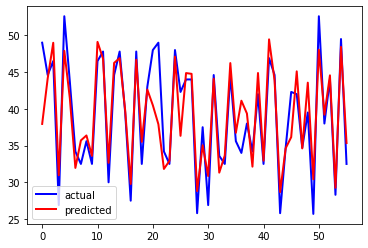

<Figure size 3600x1440 with 0 Axes>

In [71]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [72]:
#with outliers removed 
#this line taken from: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
reg_data = all_data[all_data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
reg_data

np_reg_data = reg_data.to_numpy()
X = np_reg_data[:277, :4] 
y = np_reg_data[:277, 5:]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,38.0,39.418444
1,39.5,40.084848
2,49.5,48.214926
3,42.0,45.610183
4,44.2,42.324711
5,44.0,44.879581
6,37.5,35.132126
7,42.3,36.461561
8,42.3,36.496917
9,44.2,42.229448


In [73]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))

Mean Squared Error: 12.945701144376773
Normalized Root Mean Squared Error: [0.13375515]


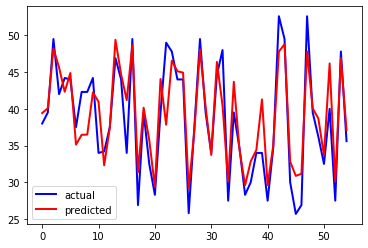

<Figure size 3600x1440 with 0 Axes>

In [74]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [75]:
#ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01) 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,34.7,34.674967
1,43.0,42.834426
2,32.5,33.355058
3,39.5,40.146780
4,34.7,35.028126
5,39.5,40.130735
6,44.0,44.995880
7,52.6,48.009046
8,28.3,29.259493
9,32.5,33.556557


In [76]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))

Mean Squared Error: 11.363831714265315
Normalized Root Mean Squared Error: [0.12531704]


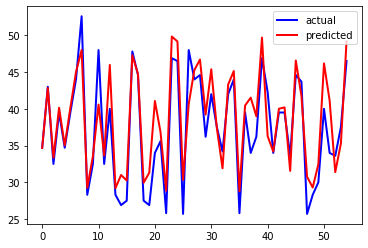

<Figure size 3600x1440 with 0 Axes>

In [77]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [78]:
#lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
coeff_used = np.sum(lasso.coef_!=0)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

#lasso001 = Lasso(alpha=0.01, max_iter=10e5)
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
#lasso001.fit(X_train,y_train)
#y_pred = lasso001.predict(X_test)
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
#print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))


Mean Squared Error: 10.1373671297937
Normalized Root Mean Squared Error: [0.11836146]


,Actual,Predicted
0,25.7,30.656010
1,25.8,29.398627
2,46.9,49.341253
3,40.0,45.955668
4,33.6,31.635179
5,32.5,33.637038
6,44.0,45.031609
7,38.0,39.618586
8,25.8,29.108585
9,25.7,30.640732


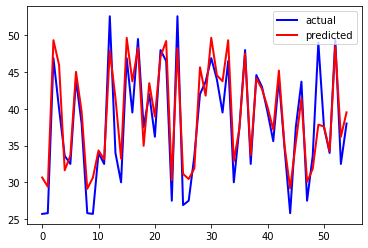

<Figure size 3600x1440 with 0 Axes>

In [79]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [2]:
#ElasticNet 
from sklearn.linear_model import ElasticNet

In [17]:
enet = ElasticNet(alpha=0.25, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,47.8,46.546881
1,32.5,32.990197
2,42.0,43.295134
3,27.5,29.540037
4,42.0,45.501436
5,38.0,38.245479
6,30.0,32.582803
7,44.0,44.490877
8,43.7,41.110526
9,46.9,49.136885


In [16]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))

Mean Squared Error: 17.213933531521707
Normalized Root Mean Squared Error: [0.15423672]


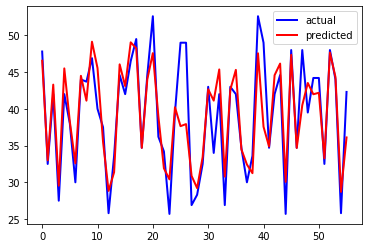

<Figure size 3600x1440 with 0 Axes>

In [18]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [19]:
enet = ElasticNet(alpha=0.5, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,34.2,32.023750
1,49.0,38.271755
2,46.5,48.701513
3,52.6,47.691693
4,26.9,30.974921
5,32.5,35.641417
6,42.3,36.161096
7,34.0,40.785607
8,49.5,48.213261
9,33.6,31.469027


In [14]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))

Mean Squared Error: 16.568762845168102
Normalized Root Mean Squared Error: [0.15131876]


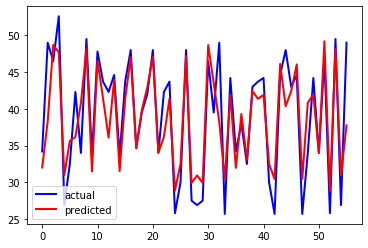

<Figure size 3600x1440 with 0 Axes>

In [20]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [21]:
enet = ElasticNet(alpha=0.75, l1_ratio=0.7)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43.0,42.773326
1,44.2,42.302575
2,37.5,37.519524
3,36.2,39.117733
4,42.0,43.315015
5,44.6,46.510475
6,37.5,37.459960
7,33.6,31.642618
8,35.6,36.957987
9,26.9,31.104275


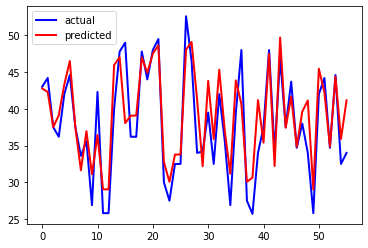

<Figure size 3600x1440 with 0 Axes>

In [22]:
#graph the results
plt.plot(y_test, marker='', color='blue', linewidth=2, label='actual')
plt.plot(y_pred, marker='', color='red', linewidth=2, label='predicted')
plt.legend()
plt.figure(figsize=(50,20))
plt.show()

In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Normalized Root Mean Squared Error:', sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)))

Mean Squared Error: 13.994986579514858
Normalized Root Mean Squared Error: [0.13907016]
